In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import math
import sys
from collections import defaultdict, deque, Counter
from itertools import combinations
from IPython.display import display
from notebook import plot_NQueens

In [2]:
class Problem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When yiou create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        
        raise NotImplementedError
    def result(self, state, action): 
        raise NotImplementedError
    def is_goal(self, state):        
        return state == self.goal
    def action_cost(self, s, a, s1): 
        return 1
    
    def __str__(self):
        return '{0}({1}, {2})'.format(
            type(self).__name__, self.initial, self.goal)

In [3]:
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __str__(self): 
        return '<{0}>'.format(self.state)
    def __len__(self): 
        return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): 
        return self.path_cost < other.path_cost


In [4]:
failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.

In [5]:
def expand(problem, state):
    return problem.actions(state)

In [6]:
class NQueensProblem(Problem):

    def __init__(self, N):
        super().__init__(initial=tuple(random.randint(0,N-1) for _ in tuple(range(N))))
        self.N = N

    def actions(self, state):
        """ finds the nearest neighbors"""
        neighbors = []
        for i in range(self.N):
            for j in range(self.N):
                if j == state[i]:
                    continue
                s1 = list(state)
                s1[i]=j
                new_state = tuple(s1)
                yield Node(state=new_state)

    def result(self, state, row):
        """Place the next queen at the given row."""
        col = state.index(-1)
        new = list(state[:])
        new[col] = row
        return tuple(new)

    def conflicted(self, state, row, col):
        """Would placing a queen at (row, col) conflict with anything?"""
        return any(self.conflict(row, col, state[c], c)
                   for c in range(col))

    def conflict(self, row1, col1, row2, col2):
        """Would putting two queens in (row1, col1) and (row2, col2) conflict?"""
        return (row1 == row2 or  # same row
                col1 == col2 or  # same column
                row1 - col1 == row2 - col2 or  # same \ diagonal
                row1 + col1 == row2 + col2)  # same / diagonal

    def goal_test(self, state):
        return not any(self.conflicted(state, state[col], col)
                       for col in range(len(state)))

    def h(self, node):
        """Return number of conflicting queens for a given node"""
        num_conflicts = 0
        num_conflicts = 0
        for (r1,c1) in enumerate(node.state):
            for (r2,c2) in enumerate(node.state):
                if(r1,c1) != (r2,c2):
                    num_conflicts += self.conflict(r1,c1,r2,c2)
        return num_conflicts

        return num_conflicts

In [7]:
def shuffled(iterable):
    """Randomly shuffle a copy of iterable."""
    items = list(iterable)
    random.shuffle(items)
    return items


In [8]:
def argmin_random_tie(seq, key):
    """Return an element with highest fn(seq[i]) score; break ties at random."""
    return min(shuffled(seq), key=key)


In [9]:
def hill_climbing(problem,iterations = 10000):
    # as this is a stochastic algorithm, we will set a cap on the number of iterations        
    current = Node(problem.initial)
    i=1
    while i < iterations:
        neighbors = expand(problem,current.state)
        if not neighbors:
            break
        neighbor = argmin_random_tie(neighbors,key=lambda node:problem.h(node))
        if problem.h(neighbor) <= problem.h(current):
            """Note that it is based on neggative path cost method"""
            current.state = neighbor.state
            if problem.goal_test(current.state)==True:
                print("Goal test succeeded at iteration {0}.",format(i))
                return current
        i += 1        
    return current    


C:\Users\DINESHKUMAR\notebook.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


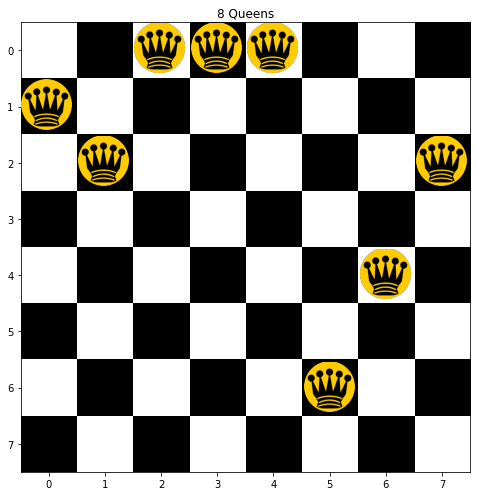

In [10]:
nq1=NQueensProblem(8)
plot_NQueens(nq1.initial)

In [11]:
n1 = Node(state=nq1.initial)
num_conflicts = nq1.h(n1)
print("Initial Conflicts = {0}".format(num_conflicts))

Initial Conflicts = 18


In [18]:
import time
start=time.time()
sol1=hill_climbing(nq1,iterations=20000)
end=time.time()

Goal test succeeded at iteration {0}. 5


In [19]:
sol1.state

(5, 7, 1, 3, 0, 6, 4, 2)

In [20]:
num_conflicts = nq1.h(sol1)
print("Final Conflicts = {0}".format(num_conflicts))

Final Conflicts = 0


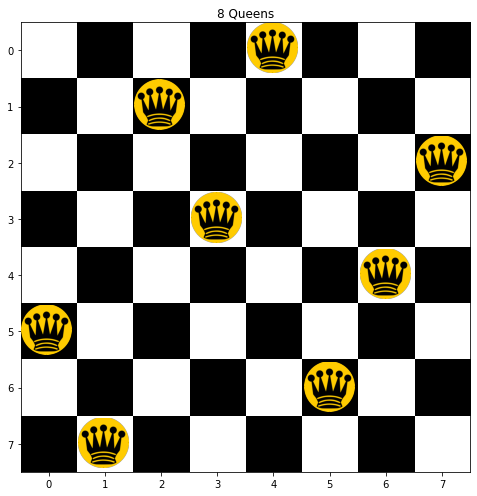

The total time required is 0.0202 seconds


In [21]:
plot_NQueens(list(sol1.state))
print("The total time required is {0:.4f} seconds".format(end-start))

In [22]:
n_values=[2**x for x in range(3,7)]
time_taken=[]
num=1
for each_i in n_values:
    nq1=NQueensProblem(each_i)
    print("Type {0}:\tN-value:{1}".format(num,each_i))
    n1 = Node(state=nq1.initial)
    num_conflicts = nq1.h(n1)
    print("Initial Conflicts = {0}\n".format(num_conflicts))
    start=time.time()
    sol1=hill_climbing(nq1,iterations=100)
    end=time.time()
    print(sol1.state)
    num_conflicts = nq1.h(sol1)
    print("Final Conflicts = {0}".format(num_conflicts))
    print("The total time required is {0:.4f} seconds\n\n".format(end-start))
    time_taken.append(end-start)
    num+=1
    

Type 1:	N-value:8
Initial Conflicts = 16

Goal test succeeded at iteration {0}. 3
(1, 5, 7, 2, 0, 3, 6, 4)
Final Conflicts = 0
The total time required is 0.0723 seconds


Type 2:	N-value:16
Initial Conflicts = 46

Goal test succeeded at iteration {0}. 20
(14, 11, 1, 5, 7, 2, 15, 13, 8, 4, 0, 12, 10, 6, 3, 9)
Final Conflicts = 0
The total time required is 0.6457 seconds


Type 3:	N-value:32
Initial Conflicts = 68

Goal test succeeded at iteration {0}. 57
(13, 17, 8, 31, 28, 25, 23, 26, 9, 6, 4, 0, 14, 11, 2, 5, 19, 22, 27, 30, 7, 29, 1, 18, 16, 3, 10, 20, 24, 15, 21, 12)
Final Conflicts = 0
The total time required is 28.6345 seconds


Type 4:	N-value:64
Initial Conflicts = 170

Goal test succeeded at iteration {0}. 59
(51, 21, 1, 46, 37, 62, 53, 41, 19, 47, 16, 24, 34, 6, 39, 25, 23, 7, 42, 38, 59, 2, 8, 54, 4, 55, 18, 44, 15, 29, 35, 60, 58, 61, 48, 43, 40, 49, 36, 57, 12, 32, 3, 27, 17, 9, 20, 0, 63, 26, 5, 33, 10, 28, 50, 52, 13, 11, 14, 30, 45, 56, 31, 22)
Final Conflicts = 0
The to

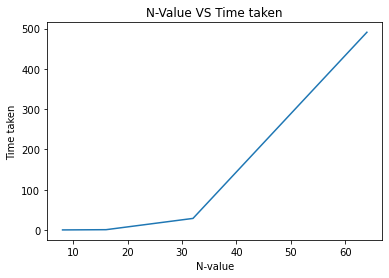

In [23]:
plt.title("N-Value VS Time taken")
plt.xlabel("N-value")
plt.ylabel("Time taken")
plt.plot(n_values,time_taken)
plt.show()